In [1]:
import numpy as np
from glob import glob
import itertools 
from skimage.io import imread, imshow
from skimage.feature import canny
from skimage.filters import sobel, laplace, prewitt, roberts
from scipy import ndimage as ndi
import cv2
import matplotlib.pyplot as plt

In [2]:
images_path = glob('*.jpg')
images_path

['здание.jpg', 'арбуз.jpg', 'рентген.jpg', 'images.jpg']

In [3]:
images = list(map(imread, images_path))

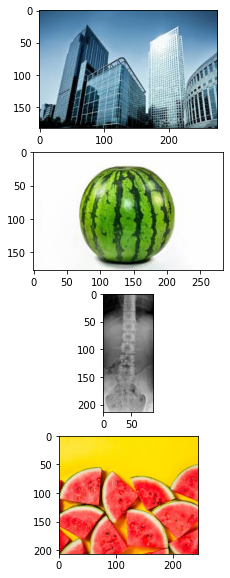

In [4]:
fig, axs = plt.subplots(nrows = len(images), ncols = 1, figsize = (8,10))

for idx, image in enumerate(images):
    axs[idx].imshow(image)

## Алгоритм Кенни

In [5]:
def canny_border(image, threshold1, threshold2):
    image = cv2.GaussianBlur(image, (3, 3), 0);
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edg = cv2.Canny(gray, threshold1, threshold2)
    return edg


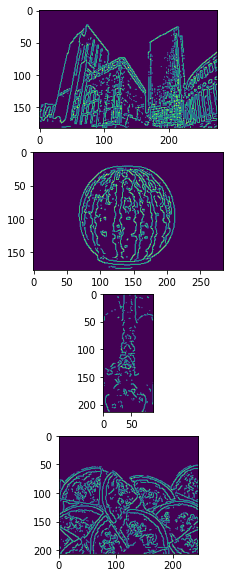

In [6]:
fig, axs = plt.subplots(nrows = len(images), ncols = 1, figsize = (8,10))

for idx, image in enumerate(images):
    axs[idx].imshow(canny_border(image, 100, 100)) #нужно проварьировать числа, например (100,200), (10,200) и глянуть результат

## Алгоритм Робертса

In [7]:
def roberts_border(image):
    image = cv2.GaussianBlur(image, (3, 3), 0);
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    kernelx = np.array([[1,0],[0, -1]])
    kernely = np.array([[0,1],[-1,0]])
    
    img_robertsx = cv2.filter2D(gray, -1, kernelx)
    img_robertsy = cv2.filter2D(gray, -1, kernely)
    img_roberts = img_robertsx + img_robertsy
    
    return(img_roberts)

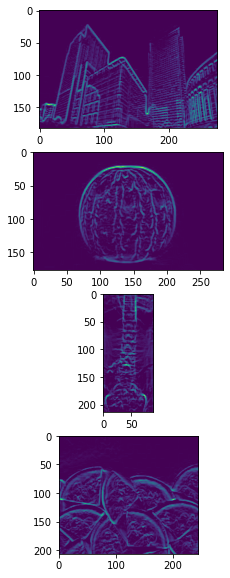

In [8]:
fig, axs = plt.subplots(nrows = len(images), ncols = 1, figsize = (8,10))

for idx, image in enumerate(images):
    axs[idx].imshow(roberts_border(image))

## Алгоритм Преввита

In [9]:
def prewitt_border(image):
    image = cv2.GaussianBlur(image, (3, 3), 0);
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    
    img_prewittx = cv2.filter2D(gray, -1, kernelx)
    img_prewitty = cv2.filter2D(gray, -1, kernely)
    img_prewitt = img_prewittx + img_prewitty
     
    return(img_prewitt)

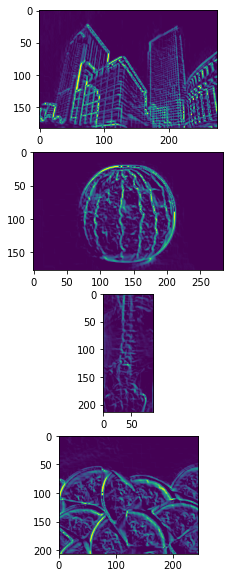

In [10]:
fig, axs = plt.subplots(nrows = len(images), ncols = 1, figsize = (8,10))
for idx, image in enumerate(images):
    axs[idx].imshow(prewitt_border(image))

## Алгоритм Собеля

In [11]:
def sobel_border(image, ksize):
    ddepth = cv2.CV_16S
    image = cv2.GaussianBlur(image, (3, 3), 0)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edg = cv2.Sobel(gray, ddepth, 1, 0, ksize=ksize, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    return edg

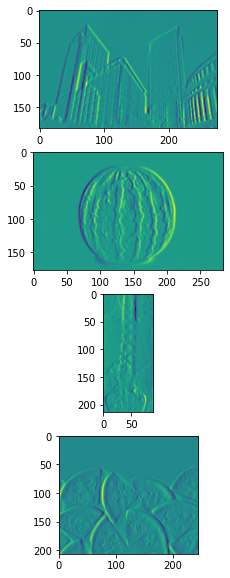

In [12]:
fig, axs = plt.subplots(nrows = len(images), ncols = 1, figsize = (8,10))
for idx, image in enumerate(images):
    axs[idx].imshow(sobel_border(image, 3)) #проварьировать (3,5,7)

## Алгоритм Лапласиана

In [13]:
def laplasian_border(image, ksize):
    ddepth = cv2.CV_16S
    image = cv2.GaussianBlur(image, (3, 3), 0);
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edg = cv2.Laplacian(gray, ddepth, ksize = ksize)
    return edg

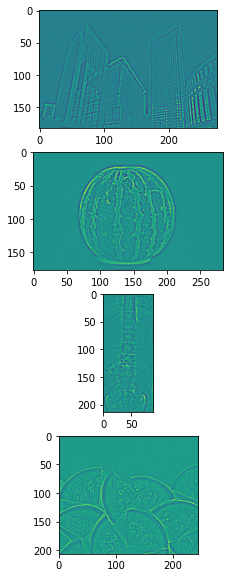

In [14]:
fig, axs = plt.subplots(nrows = len(images), ncols = 1, figsize = (8,10))
for idx, image in enumerate(images):
    axs[idx].imshow(laplasian_border(image, 3))